<a href="https://colab.research.google.com/github/FernandoMdAraujo/PCS5024---Aprendizado-Estat-stico/blob/main/Classificacao_Base_Adult.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Bibliotecas**

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

## **Unindo Arquvo .test com arquivo .names e Importanto arquivo Adult.csv**

In [50]:
# adult.names
import re
with open('adult.names') as fp:
    cols = []
    for line in fp:
        sre = re.match(r'(?P<colname>[a-z\-]+):.*\.', line)
        if sre:
            cols.append(sre.group('colname'))
    cols.append('income')
    options = {'header': None, 'names': cols, 'skipinitialspace': True}
# adult.data
df = pd.read_csv('adult.csv') # Adiciona Cabecalho ao dataframe de validacao
df_test = pd.read_csv('adult.test', **options) # Adiciona Cabecalho ao dataframe de teste
df.head(10)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,<=50K
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,>50K
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,<=50K
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,<=50K


# **Preparando os dados**

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
df_test=df_test.dropna() # Exclui linhas NAN no dataframe de teste

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [54]:
# Agrupando marital-status em 3
df['marital-status']= df['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df['marital-status']= df['marital-status'].replace(['Never-married'], 'not-married')
df['marital-status']= df['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

df_test['marital-status']= df_test['marital-status'].replace(['Married-civ-spouse', 'Married-AF-spouse'], 'married')
df_test['marital-status']= df_test['marital-status'].replace(['Never-married'], 'not-married')
df_test['marital-status']= df_test['marital-status'].replace(['Divorced', 'Separated','Widowed',
                                                   'Married-spouse-absent'], 'other')

In [55]:
# Removendo sinal de '?' (so aparece na base de teste)
df['workclass'] = df['workclass'].replace('?','Private')
df['occupation'] = df['occupation'].replace('?','Prof-specialty')
df['native-country'] = df['native-country'].replace('?','United-States')

df_test['workclass'] = df_test['workclass'].replace('?','Private')
df_test['occupation'] = df_test['occupation'].replace('?','Prof-specialty')
df_test['native-country'] = df_test['native-country'].replace('?','United-States')

In [56]:
# Reagrupando Education
df.education= df.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df.education = df.education.replace('HS-grad', 'high school')
df.education = df.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')

df_test.education= df_test.education.replace(['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th','10th', '11th', '12th'], 'school')
df_test.education = df_test.education.replace('HS-grad', 'high school')
df_test.education = df_test.education.replace(['Assoc-voc', 'Assoc-acdm', 'Prof-school', 'Some-college'], 'higher')

In [57]:
# Reagrupando native-country
df['native-country'] = df['native-country'].replace(['Mexico', 'Puerto-Rico', 'El-Salvador', 'Cuba','Jamaica', 'Dominican-Republic', 'Guatemala','Columbia', 'Haiti', 'Nicaragua', 'Peru', 'Ecuador', 'Honduras', 'Trinadad&Tobago' ], 'Latin')
df['native-country'] = df['native-country'].replace(['Philippines', 'Cambodia', 'China', 'Japan', 'Taiwan','Hong', 'Thailand', 'Vietnam' , 'Laos'], 'Asian')
df['native-country'] = df['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Greece', 'Ireland', 'Yugoslavia', 'Hungary', 'Scotland', 'Holand-Netherlands'], 'Europe')
df['native-country'] = df['native-country'].replace(['South'], 'Africa')
df['native-country'] = df['native-country'].replace(['India', 'Iran', 'Outlying-US(Guam-USVI-etc)'], 'Others')

df_test['native-country'] = df_test['native-country'].replace(['Mexico', 'Puerto-Rico', 'El-Salvador', 'Cuba','Jamaica', 'Dominican-Republic', 'Guatemala','Columbia', 'Haiti', 'Nicaragua', 'Peru', 'Ecuador', 'Honduras', 'Trinadad&Tobago' ], 'Latin')
df_test['native-country'] = df_test['native-country'].replace(['Philippines', 'Cambodia', 'China', 'Japan', 'Taiwan','Hong', 'Thailand', 'Vietnam' , 'Laos'], 'Asian')
df_test['native-country'] = df_test['native-country'].replace(['Germany', 'England', 'Italy', 'Poland', 'Portugal', 'France', 'Greece', 'Ireland', 'Yugoslavia', 'Hungary', 'Scotland', 'Holand-Netherlands'], 'Europe')
df_test['native-country'] = df_test['native-country'].replace(['South'], 'Africa')
df_test['native-country'] = df_test['native-country'].replace(['India', 'Iran', 'Outlying-US(Guam-USVI-etc)'], 'Others')

In [58]:
# Adotando padrao numerico para Income
df.Income = df.income.replace('<=50K', 0)
df.Income = df.income.replace('>50K', 1)

df_test.Income = df_test.income.replace('<=50K', 0)
df_test.Income = df_test.income.replace('>50K', 1)

In [59]:
# Transfomando dados nao numericos em numericos
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import OneHotEncoder #nao introduz vies referente a ordem
df1 = df.copy()
df1 = df1.apply(LabelEncoder().fit_transform)
df_test1 = df_test.copy()
df_test1 = df_test1.apply(LabelEncoder().fit_transform)

In [60]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,21.643585,13.710510,0.0,11.00,20.0,31.00,73.0
workclass,48842.0,3.099668,1.110810,0.0,3.00,3.0,3.00,7.0
fnlwgt,48842.0,13716.956185,7945.509369,0.0,6995.25,13522.5,20243.75,28522.0
education,48842.0,3.005528,1.556078,0.0,3.00,3.0,4.00,5.0
educational-num,48842.0,9.078089,2.570973,0.0,8.00,9.0,11.00,15.0
marital-status,48842.0,0.752119,0.780119,0.0,0.00,1.0,1.00,2.0
occupation,48842.0,6.152819,3.968837,0.0,3.00,7.0,9.00,13.0
relationship,48842.0,1.443287,1.602151,0.0,0.00,1.0,3.00,5.0
race,48842.0,3.668052,0.845986,0.0,4.00,4.0,4.00,4.0
gender,48842.0,0.668482,0.470764,0.0,0.00,1.0,1.00,1.0


In [61]:
df['native-country'].value_counts()

United-States    44689
Latin             2072
Europe             780
Asian              771
Others             233
Canada             182
Africa             115
Name: native-country, dtype: int64

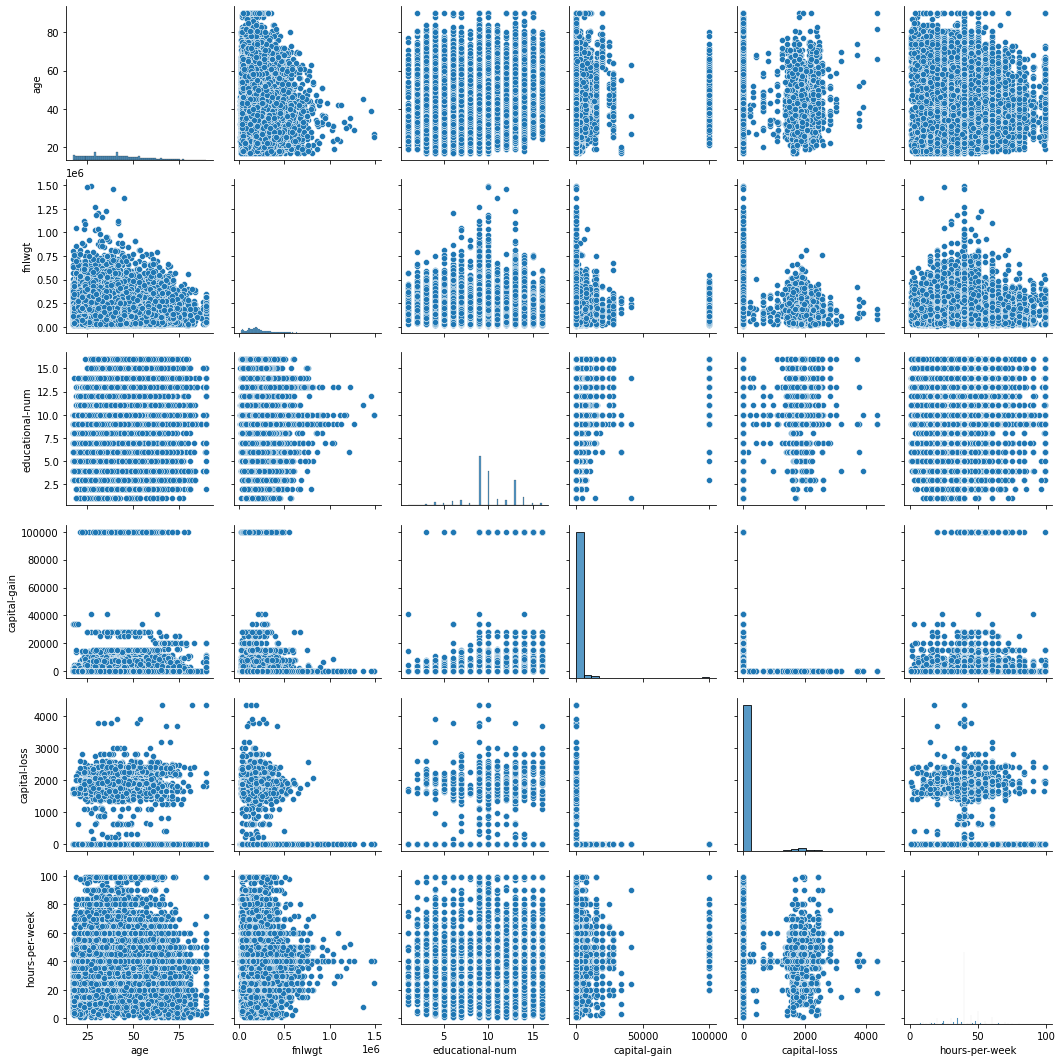

In [62]:
sns.pairplot(df)

# **Bibilioteca de Modelos e Separacao da Base em Treino e Teste**

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler


In [64]:
scaler = MinMaxScaler()
scaler.fit(df1)
scaled = scaler.fit_transform(df1)
scaled_df1 = pd.DataFrame(scaled, columns=df.columns)

X = scaled_df1.drop(['income'], axis=1)
y = scaled_df1['income']
#X_Test = df_test1
validation_size = .3
seed = 13
X_train, X_val, y_train, y_val = train_test_split (X, y, test_size= validation_size, random_state = seed)

In [65]:
scaled_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
age,48842.0,0.296487,0.187815,0.0,0.150685,0.273973,0.424658,1.0
workclass,48842.0,0.442810,0.158687,0.0,0.428571,0.428571,0.428571,1.0
fnlwgt,48842.0,0.480925,0.278575,0.0,0.245258,0.474108,0.709759,1.0
education,48842.0,0.601106,0.311216,0.0,0.600000,0.600000,0.800000,1.0
educational-num,48842.0,0.605206,0.171398,0.0,0.533333,0.600000,0.733333,1.0
marital-status,48842.0,0.376060,0.390059,0.0,0.000000,0.500000,0.500000,1.0
occupation,48842.0,0.473294,0.305295,0.0,0.230769,0.538462,0.692308,1.0
relationship,48842.0,0.288657,0.320430,0.0,0.000000,0.200000,0.600000,1.0
race,48842.0,0.917013,0.211497,0.0,1.000000,1.000000,1.000000,1.0
gender,48842.0,0.668482,0.470764,0.0,0.000000,1.000000,1.000000,1.0


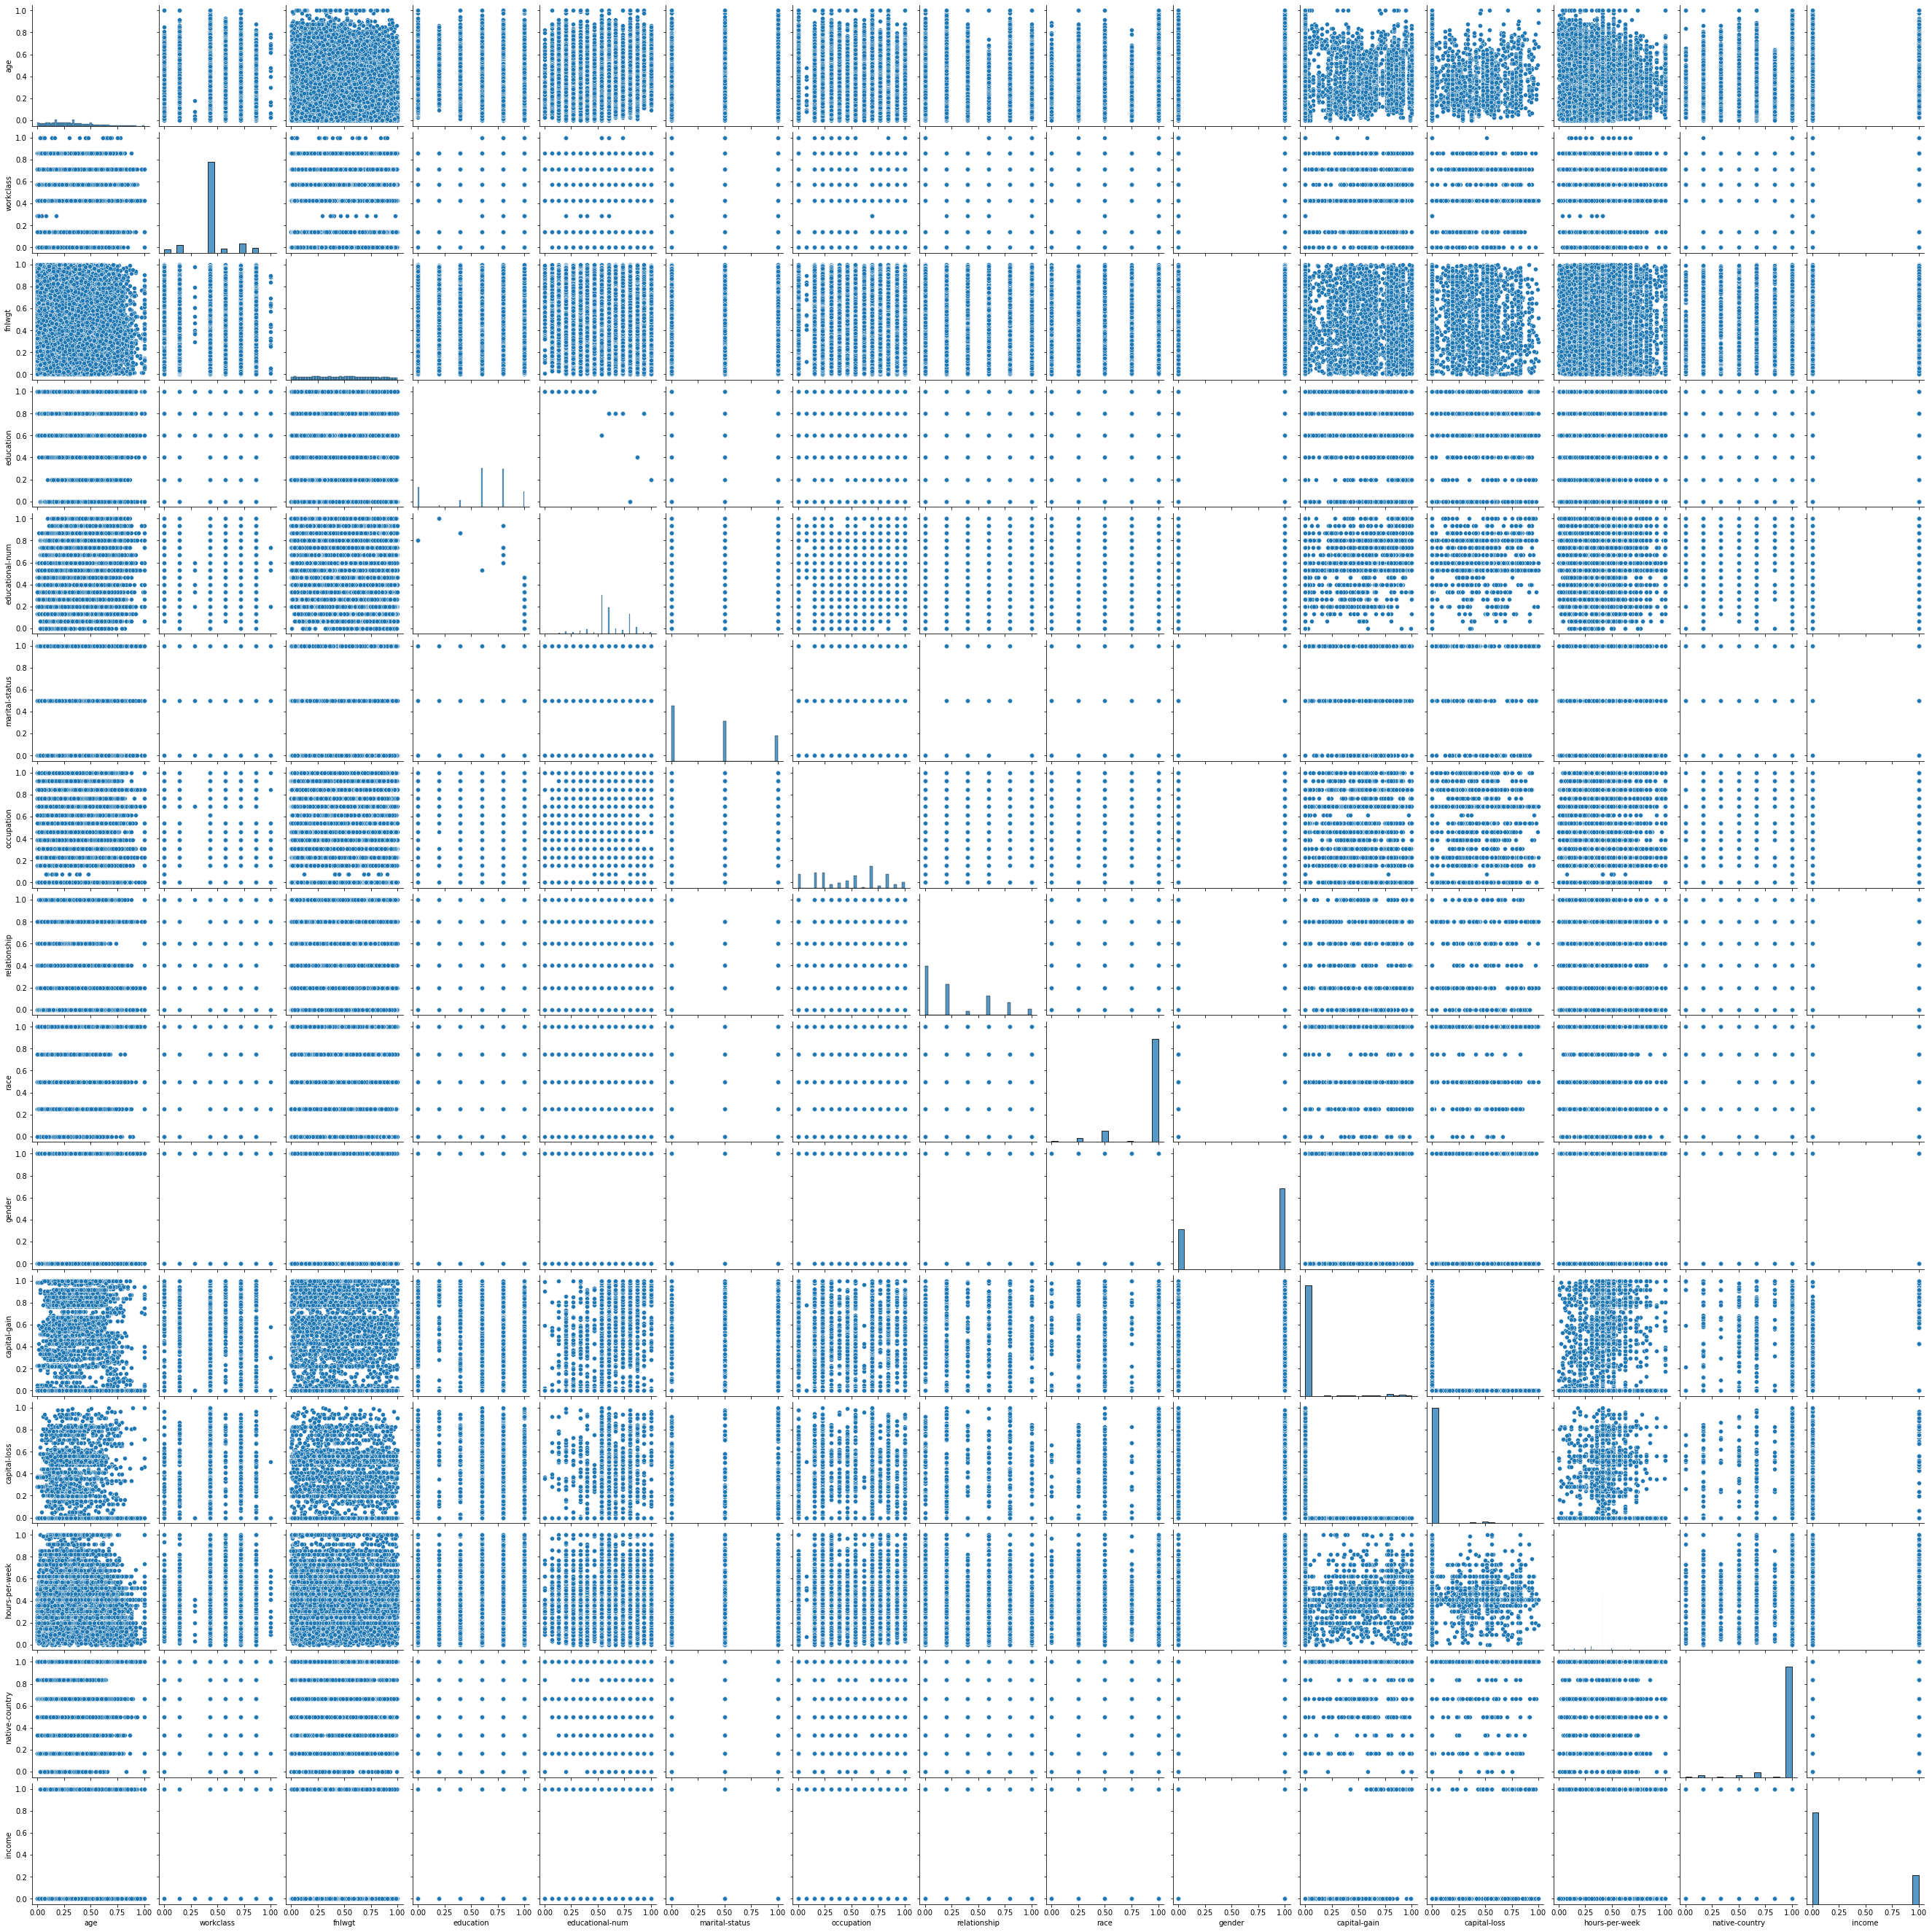

In [66]:
sns.pairplot(scaled_df1)

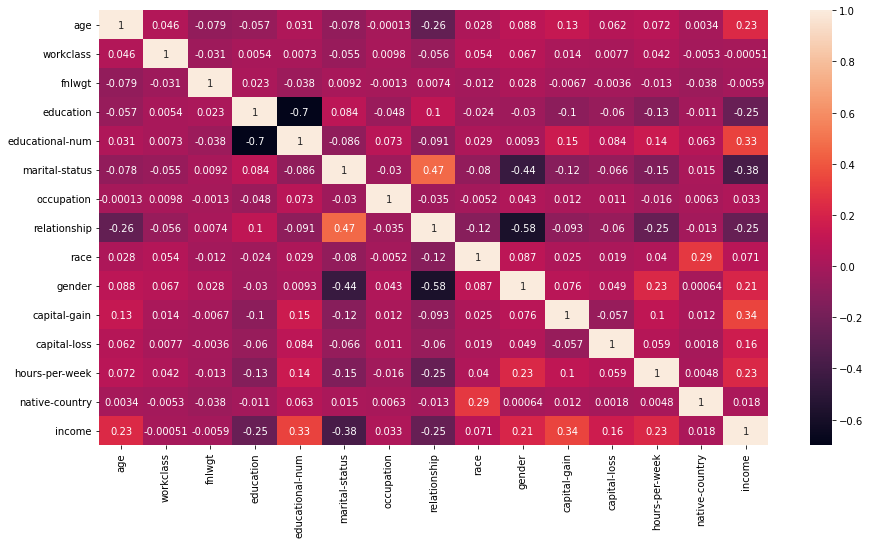

In [67]:
plt.figure(figsize = (15,8))
sns.heatmap(scaled_df1.corr(), annot=True);

# **KNN**

In [68]:
# Otimizacao de Hyperparametro
n_neighbors = list(range(20,30))
# Conversao em dicionario
hyperparameters = dict(n_neighbors=n_neighbors)
# Instanciando o modelo KNN
knn_2 = KNeighborsClassifier()
# Usando a funcao GridSearch
clf_knn_2 = GridSearchCV(knn_2, hyperparameters, cv=5)
# Retornando melhores valores
best_model = clf_knn_2.fit(X_train, y_train)
k = best_model.best_estimator_.get_params()['n_neighbors']
# Imprimindo melhores valores
print('Melhor numero de vizinhos, k =', best_model.best_estimator_.get_params()['n_neighbors'])

Melhor numero de vizinhos, k = 22


In [69]:
# Definindo o numero de vizinhos ( K = ?) - Esse valor foi obtido atraves do metodo GridSearch
n_neighbors = k
# Instanciando o Modelo do Classificador
clf_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
# Executando no Conjunto de Treinamento
clf_knn.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_KNN = clf_knn.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_knn.score(X_val, y_val)

0.8454241452262335

In [120]:
print(classification_report(y_val, y_pred_KNN, target_names=['<=50K', '>50k']))

              precision    recall  f1-score   support

       <=50K       0.88      0.93      0.90     11092
        >50k       0.72      0.59      0.65      3561

    accuracy                           0.85     14653
   macro avg       0.80      0.76      0.77     14653
weighted avg       0.84      0.85      0.84     14653



In [121]:
# Matriz de Confusao
confusion_matrix(y_val, y_pred_KNN)

array([[10294,   798],
       [ 1467,  2094]])

# **SVM**

In [107]:
# Definindo valores dos hyperparametros para serem testados
parameter_space = {
      'C': [0.1, 1],
      'gamma': [1, 0.1],
      'kernel': ['rbf']}
# Instanciando o modelo Suport Vector Machine (SVM)
clf_svm = svm.SVC()
# Chamando a funcao para otimizar os hyperparametros do DT
clf_svm1 = GridSearchCV(clf_svm, parameter_space, n_jobs=-1, cv=5)
# Executando no Conjunto de Treinamento
best_model_svm1 = clf_svm1.fit(X_train, y_train)

In [108]:
# Imprimindo melhores valores
print(f'Melhores parametros: {best_model_svm1.best_params_}')

Melhores parametros: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}


In [109]:
# Instanciando o Modelo do Classificador
clf_svm = svm.SVC(C = 1, gamma = 1, kernel = 'rbf')
# Executando no Conjunto de Treinamento
clf_svm.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_SVM = clf_svm.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_svm.score(X_val, y_val)

0.8456971268682181

In [122]:
print(classification_report(y_val, y_pred_SVM, target_names=['<=50K', '>50k']))

              precision    recall  f1-score   support

       <=50K       0.87      0.94      0.90     11092
        >50k       0.75      0.55      0.63      3561

    accuracy                           0.85     14653
   macro avg       0.81      0.74      0.77     14653
weighted avg       0.84      0.85      0.84     14653



In [123]:
# Matriz de Confusao
confusion_matrix(y_val, y_pred_SVM)

array([[10441,   651],
       [ 1610,  1951]])

# **Regressao Logistica**

In [113]:
# Definindo valores dos hyperparametros para serem testados
parameter_space = {
      'solver' : ['newton-cg', 'lbfgs', 'liblinear'],
      'penalty' : ['none', 'l1', 'l2', 'elasticnet'],
      'C' : [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100]}
# Instanciando o modelo Suport Vector Machine (SVM)
clf_lr = LogisticRegression()
# Chamando a funcao para otimizar os hyperparametros do DT
clf_lr1 = GridSearchCV(clf_lr, parameter_space, scoring='accuracy', n_jobs=-1, cv=5)
# Executando no Conjunto de Treinamento
best_model_lr1 = clf_lr1.fit(X_train, y_train)

In [114]:
# Imprimindo melhores valores
print(f'Melhores parametros: {best_model_lr1.best_params_}')

Melhores parametros: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}


In [115]:
# Instanciando o Modelo do Classificador
clf_lr = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'newton-cg')
# Executando no Conjunto de Treinamento
clf_lr.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_lr = clf_lr.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_lr.score(X_val, y_val)

0.8359380331672696

In [124]:
print(classification_report(y_val, y_pred_lr, target_names=['<=50K', '>50k']))

              precision    recall  f1-score   support

       <=50K       0.86      0.94      0.90     11092
        >50k       0.73      0.52      0.61      3561

    accuracy                           0.84     14653
   macro avg       0.79      0.73      0.75     14653
weighted avg       0.83      0.84      0.83     14653



In [125]:
# Matriz de Confusao
confusion_matrix(y_val, y_pred_lr)

array([[10387,   705],
       [ 1699,  1862]])

# **Árvore de Decisão**

In [98]:
# Definindo valores dos hyperparametros para serem testados
parameter_space = {
    "splitter":["best","random"],
    "max_depth" : [1,9,12],
    "min_samples_leaf":[1,5,10],
    "min_weight_fraction_leaf":[0.1,0.5,0.9],
    "max_features":["auto","log2","sqrt",None],
    "max_leaf_nodes":[None,10,50,90]}
# Instanciando o modelo Decision Tree (DT)
clf_dT = DecisionTreeClassifier()
# Chamando a funcao para otimizar os hyperparametros do DT
clf_dT1 = GridSearchCV(clf_dT, parameter_space, n_jobs=-1, cv=5)
# Executando no Conjunto de Treinamento
best_model_dT1 = clf_dT1.fit(X_train, y_train)

In [99]:
# Imprimindo melhores valores
print(f'Melhores parametros: {best_model_dT1.best_params_}')

Melhores parametros: {'max_depth': 9, 'max_features': None, 'max_leaf_nodes': None, 'min_samples_leaf': 1, 'min_weight_fraction_leaf': 0.1, 'splitter': 'best'}


In [101]:
# Instanciando o Modelo do Classificador
clf_dT = DecisionTreeClassifier(max_depth = 9, max_features = None, max_leaf_nodes = None, min_samples_leaf = 1, min_weight_fraction_leaf = 0.1, splitter = 'best')
# Executando no Conjunto de Treinamento
clf_dT.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_dT = clf_dT.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_dT.score(X_val, y_val)

0.8179212447962875

In [126]:
print(classification_report(y_val, y_pred_dT, target_names=['<=50K', '>50k']))

              precision    recall  f1-score   support

       <=50K       0.83      0.95      0.89     11092
        >50k       0.72      0.42      0.53      3561

    accuracy                           0.82     14653
   macro avg       0.78      0.68      0.71     14653
weighted avg       0.81      0.82      0.80     14653



In [127]:
confusion_matrix(y_val, y_pred_dT)

array([[10506,   586],
       [ 2082,  1479]])

# **Floresta Aleatória**

In [91]:
# Definindo valores dos hyperparametros para serem testados
parameter_space = {
    'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}
# Instanciando o modelo Random Forest
clf_rf = RandomForestClassifier()
# Chamando a funcao para otimizar os hyperparametros do RF
clf_rf1 = GridSearchCV(clf_rf, parameter_space, n_jobs=-1, cv=5)
# Executando no Conjunto de Treinamento
best_model_rf1 = clf_rf1.fit(X_train, y_train)

In [92]:
# Imprimindo melhores valores
print(f'Melhores parametros: {best_model_rf1.best_params_}')

Melhores parametros: {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'n_estimators': 13}


In [93]:
# Instanciando o Modelo do Classificador
clf_rf = RandomForestClassifier(bootstrap = True, max_depth = 10, max_features = 'auto', n_estimators = 13)
# Executando no Conjunto de Treinamento
clf_rf.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_rf = clf_rf.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_rf.score(X_val, y_val)

0.8572306012420665

In [128]:
print(classification_report(y_val, y_pred_rf, target_names=['<=50K', '>50k']))

              precision    recall  f1-score   support

       <=50K       0.87      0.95      0.91     11092
        >50k       0.79      0.56      0.66      3561

    accuracy                           0.86     14653
   macro avg       0.83      0.76      0.78     14653
weighted avg       0.85      0.86      0.85     14653



In [129]:
confusion_matrix(y_val, y_pred_rf)

array([[10555,   537],
       [ 1555,  2006]])

# **MLP**

In [84]:
mlp = MLPClassifier(max_iter=10)
# Definindo valores dos hyperparametros para serem testados
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (15,10,15), (15,50)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
# Chamando a funcao para otimizar os hyperparametros do MLP (n_jobs corresponde ao numero de CPUs disponiveis)
clf_MLP = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5)
# Executando no Conjunto de Treinamento
best_model = clf_MLP.fit(X_train, y_train)
# Imprimindo melhores valores
print(f'Melhores parametros: {best_model.best_params_}')

Melhores parametros: {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}


In [130]:
# Instanciando o Modelo do Classificador
clf_MLP = MLPClassifier(hidden_layer_sizes = (50, 50, 50), max_iter=10, activation = 'relu', solver = 'adam', learning_rate= 'adaptive', alpha= 0.0001)
#clf_MLP = MLPClassifier()
# Executando no Conjunto de Treinamento
clf_MLP.fit(X_train, y_train)
# Fazendo a Predicao no Conjunto de Teste
y_pred_MLP = clf_rf.predict(X_val)
# Calculando a Acuracia (Fracao de Previsoes Corretas)
clf_MLP.score(X_val, y_val)

0.8490411519825292